In [1]:
import herbie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
def get_temp(time, coordinates):
    """
    Finds the outside temperature at a given time and coordinates
    If time is in the past, it will retrieve past data
    If time is in the future, it will find the forecast
    """

    # Convert to UTC (Maine is UTC-4)
    time += timedelta(hours=4)

    # Get current UTC time (round to the hour)
    now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)

    # If time is in the past
    if time < now:
        H = herbie.Herbie(
            time.strftime("%Y-%m-%d %H:%M"),
            model='hrrr', 
            product='sfc',
            fxx=0,
        )
        
    # If time is now or in the future
    else:
        H = herbie.Herbie(
            (now-timedelta(hours=1)).strftime("%Y-%m-%d %H:%M"),
            model='hrrr', 
            product='sfc',
            fxx=int((time - now).total_seconds()/3600)+1,
        )

    # Get dataset
    ds = H.xarray("TMP:2 m")

    # Get the temperature at coordinates
    x = herbie.accessors.HerbieAccessor(ds)
    temperature = x.pick_points(pd.DataFrame(coordinates), method='nearest')['t2m'].values[0] 

    return temperature


In [3]:
# Today's date in Maine (UTC-4)
today = (datetime.utcnow()-timedelta(hours=4))
today_midnight = today.replace(hour=0, minute=0, second=0, microsecond=0)

# Coordinates of a point in Maine
coordinates = {'latitude': [45.36], 'longitude': [-68.97]}

# Get today's weather at that point
wf_herbie = []
for hour in range(24):
    try:
        wf_herbie.append(get_temp(today_midnight+timedelta(hours=hour), coordinates))
    except:
        wf_herbie.append(np.nan)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/Users/thomasdefauw/data/hrrr/20240610]
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 07:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 08:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 09:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 10:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 11:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun-10 13:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jun

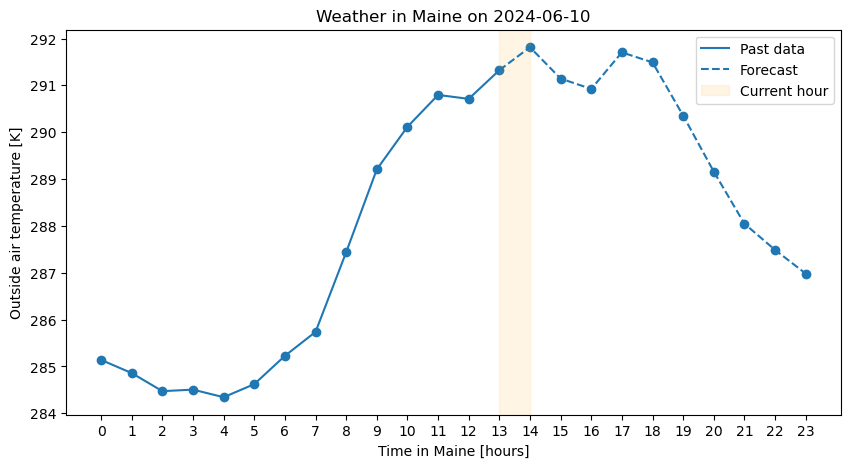

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(wf_herbie[:today.hour+1],label='Past data', color='tab:blue')
plt.plot([np.nan]*(today.hour) + wf_herbie[today.hour:], label='Forecast', linestyle='dashed', color='tab:blue')
plt.scatter(range(24), wf_herbie)
plt.axvspan(today.hour, today.hour+1, color='orange', alpha=0.1, label='Current hour')
plt.xticks(list(range(24)))
plt.xlabel('Time in Maine [hours]')
plt.ylabel('Outside air temperature [K]')
plt.title(f'Weather in Maine on {today.date()}')
plt.legend()
plt.show()